# HW2 
### Xichen Li, EE521 - Group 5

#### A) Xichen Li: I works on the HW2 independently since I don't have a teammate,.


## Schrödinger's Equation

One of the most important governing equations in all of physics. If you do anything to do with quantum mechanics, chances are you'll be dealing with Schrödinger's Equation in one form or another.

The Time Dependent Schrödinger Equation (TDSE) in one (spatial) dimension is written:

$$ i \hbar \frac{\partial}{\partial t} \Psi (x, t) = \hat{\mathbf{H}} \Psi (x,t) $$

where $\hat{\mathbf{H}}$ is the hamiltonian defined as $\hat{\mathbf{H}} = - \frac{\hbar^2}{2m} \frac{\partial^2}{\partial x^2} + V(x,t) $ and $\Psi(x,t)$ is the wave function.

In general, this is not an easy partial differential equation (PDE) to solve. Fortunately, with a few mild assumptions, we can simplify the equation to the Time Independent Schrödinger Equation (TISE):

First we assume our potential energy function is independent of time $V(x,t) = V(x)$. Then look for solutions of the form $\Psi(x,t) = \psi(x) \phi(t)$ for some $\psi(x)$ and $\phi(t)$.

$$ \hat{\mathbf{H}} \psi(x) = E \psi(x) $$

### Problem 1: Solving half of the problem for good

Given only the assumptions and notation above, solve the TDSE for $\phi(t)$ for all possible $V(x)$.

Hint: plug in $\Psi(x,t)=\psi(x)\phi(t)$ to the TDSE, apply the TISE, and solve the resulting first order ordinary differential equation.

#### Answer:
Plug in $\Psi(x,t)=\psi(x)\phi(t)$ into the TDSE $ i \hbar \frac{\partial}{\partial t} \Psi (x, t) = \hat{\mathbf{H}} \Psi (x,t) $, then solve the the two equations below:
$$i \hbar \frac{\partial}{\partial t} \phi (t) = E \phi(t)$$
$$ \hat{\mathbf{H}} \psi(x) = E \psi(x) $$
The solution for the first differential equation is:
$$ \phi(t) = Ae^{-i\frac{E}{\hbar}t} $$
Thus, the solution for the TDSE is: 
$$\Psi(x,t)=Ae^{-i\frac{E}{\hbar}t} \psi(x)$$


## Example 1: Solving Schrödinger's Equation Numerically (For Particle in the Box)

The TISE is nothing more than an eigenvalue equation, so if we can write our hamiltonian as a matrix, then all we have to is solve for the eigenvalues and eigenvectors/eigenfunctions and we'll have $\psi(x)$, and since you already found $\phi(t)$, then we'll know everything we could possibly want to about our system!

If you hear "numerically" in the context of python, you know what's coming... some `numpy` magic.

In [1]:
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt

There are two especially useful `numpy` functions we'll need here:`linalg.eig` and `eye`.

In [2]:
#np.eye?
#np.linalg.eig?

The trick to representing our hamiltonian as a matrix is discretization. See details in the lecture notes, but the notation below should be very similar.

We'll be simulating a toy system with arbitrary units

In [3]:
N = 100
L = 100

def V(x): # Return the potential energy given the position of each grid element
    return 0 * x # In this case, we are setting the potential energy to zero.

eta = 1
m = 1
q = 1

In [4]:
X = np.linspace(0,L,num=N) - L/2
a = X[1] - X[0] # grid spacing

t = -eta**2 / (2 * m * a**2)
eps = -2*t + q * V(X)

In [5]:
H = t*np.eye(N, k=-1) + eps*np.eye(N) + t*np.eye(N, k=1) # discretized hamiltonian

If you're ever curious about what your matrix actually looks like, you can plot it using `matshow`. And mouse over elements to see their values. Note that our hamitonian has offdiagonal elements, where do they come from and why do we need those?

#### Answer: 
The offdiagonal elements come from the seoncd order derivative equation in when discretizing the TISE. We need this to construct the discret matrices H to solve for the eigenfunction of TISE.  

<IPython.core.display.Javascript object>


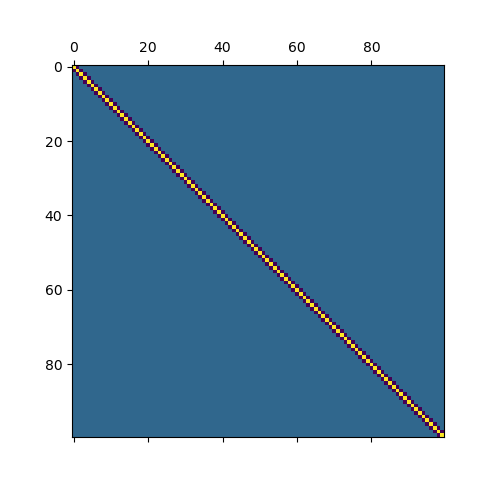

In [6]:
plt.matshow(H)

Now let's actually solve the TISE for the energies and wavefunctions using `linalg.eig`.

That brings up an interesting question: We only have one equation, but we are solving this one equation for two unknowns (the wavefunction, and the energy), thinking back to linear algebra, shouldn't this problem be underdetermined? That is to say, how is it that we can use a single equation to solve for both the wavefunction and energy?

#### Answer:
No, this problem is determined. Becasue the solution to the eigenfunction is also subject to bounday conditions, the possible values of the eigenvalue are generally limited. In addition, the eigen vectors obey the condition for normalization which also set another limit for the eigenfunction. 

In [7]:
vals, vecs = np.linalg.eig(H)

Unfortunately `linalg.eig` does not return the eigenvalues/vectors sorted, but that can be fixed with a little `numpy` magic. Make sure you understand how to two lines below work - tricks like these can dramatically speed up your work.
Also, since our `vecs` variable holds column vectors we can flip those to row vectors in the last line. We also have to normalize our wavefunctions (given the grid spacing that we were using).

In [8]:
order = np.argsort(vals)
vals, vecs = vals[order], vecs[:, order]
vecs = vecs.T
vecs /= np.sqrt(a)

Now we have the eigenvalues (which correspond to the energies of each state) and the eigenvectors (which are the states, aka wavefunctions).

Before plotting the energy spectrum below, what do you expect the energies will look like, given that our potential energy  is zero accross the entire wire (V=0)?

#### Answer:
The eigenvalue or eigen energy should have the discrete spectrum which is equal to $E_n=\frac{\hbar^2}{2m} (\frac{n\pi}{L})^2$

<IPython.core.display.Javascript object>


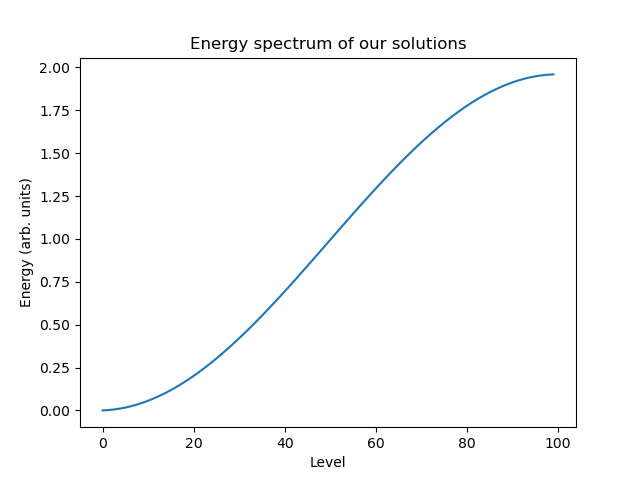

Text(0, 0.5, 'Energy (arb. units)')

In [9]:
plt.figure()
plt.plot(vals)
plt.title('Energy spectrum of our solutions')
plt.xlabel('Level')
plt.ylabel('Energy (arb. units)')

Does this spectrum look as expected? If not, why not?

#### Answer:
The energy increases like a parabola at the begining which looks as expected. However, when the energy level further increases, the curve seems stop to increase. Increasing N in the code should present more energy levels from the plot.

Finally we can plot the first few wavefunctions and corresponding energies we found. But you already know what to expect, right?

<IPython.core.display.Javascript object>


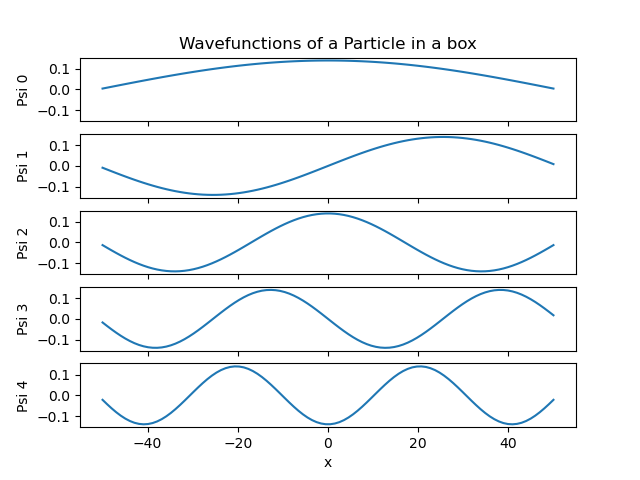

E_0 = 0.0005
E_1 = 0.0019
E_2 = 0.0043
E_3 = 0.0076
E_4 = 0.0118


Text(0.5, 0, 'x')

In [10]:
fig, axes = plt.subplots(5, sharex=True, sharey=True)
plt.sca(axes[0])
plt.title('Wavefunctions of a Particle in a box')
for i, (ax, psi, E) in enumerate(zip(axes, vecs, vals)):
    plt.sca(ax)
    plt.ylabel('Psi {}'.format(i))
    plt.plot(X, psi)
    #plt.fill_between(X, psi, alpha=0.3)
    print('E_{} = {:.4f}'.format(i, E))
plt.xlabel('x')

While this is theoretically all fine and good, being learned in the ways of quantum mechanics we know that the wavefunction is not directly measurable. Instead, if we measure for example the position of our particle, the actual outcome of our measurement will be one of the eigenvalues of the position operator. Fortunately, we have been working in the position basis (solving for our wavefunction as a function of $x$), so we can get the probability distribution over possible measurement outcomes directly from our wavefunction:

$$ p(x) = |\psi(x)|^2 $$

where $p(x)$ is the probability density function of outcomes from position measurements.

In [11]:
p = np.abs(vecs)**2

To compute the probability form our probability density function, all we need is to multiply by $dx$, in our case we have already discretized our wire so $dx = a$.

$$ \mathrm{Prob}(x) = p(x) dx $$

In [12]:
probs = a*p

<IPython.core.display.Javascript object>


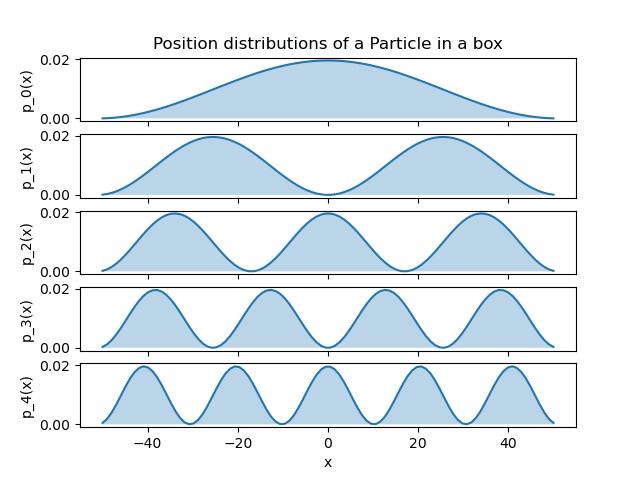

Text(0.5, 0, 'x')

In [13]:
fig, axes = plt.subplots(5, sharex=True, sharey=True)
plt.sca(axes[0])
plt.title('Position distributions of a Particle in a box')
for i, (ax, pd) in enumerate(zip(axes, p)):
    plt.sca(ax)
    plt.ylabel('p_{}(x)'.format(i))
    plt.plot(X, pd)
    plt.fill_between(X, pd, alpha=0.3)
plt.xlabel('x')

### Problem 2: Quantum Harmonic Oscillator

#### Part A:
Remember, the potential energy of a harmonic oscillators takes the form $V(x) = \frac{1}{2}kx^2$ where $k$ is the spring constant.
In our case, let us use:
$$ k = 2.10*10^{-8}  N/m $$
$$ m = 9.1*10^{-31}  kg $$
$$ \hbar = 1.054 * 10^{-34} J*s$$

Deliverables:
- Tabulate the lowest 5 energy levels
- Find the value of $\hbar \omega$, $E_2 - E_1$, $E_3 - E_2$, and $E_4 - E_3$? 


#### Part B:
Example 1 has the code to compute and plot the 5 lowest energy states of a particle confined to a box from `-L/2` to `L/2`.
Now do the same for a particle in a hamronic potential using the parameters given above. Assume that the length of the simulation region is $ L = 0.2 \mu m$

Further assume that the numerical values of the PE are: 
$$ PE(x)=   \left\{
\begin{array}{ll}
      \frac{1}{2} kx^2 & -0.06um<x<0.06um \\
      3.78*10^{-23} & Otherwise \\
\end{array} 
\right.  $$

Plot the PE(x) and realize that it is not perfectly Harmonic. This is usually the case in most realistic situations. Often there are anharmonic corrections to the PE. A common anharmonic correction that is encountered in qubits and crystals is a cubic term ($PE(x) = \frac{1}{2} kx^2 + \gamma x^3$).

When plotting the energy spectrum of the solutions, once again predict what shape the spectrum should take, and then after plotting explain any differences to your prediction.

Deliverables:
- Tabulate the lowest 5 energy levels
- Find the value of $\hbar \omega$, $E_2 - E_1$, $E_3 - E_2$, and $E_4 - E_3$? Is there any differece from what you got in Part A?
- Plot of the wavefunctions of the lowest 5 energy levels
- Plot of the probability density functions of outcomes of position measurements for the lowest 5 energy levels


#### Answers --- Part A
According to the lecture note, the TISE of the harmonic system becomes:
$$[-\frac{\hbar^2}{2m} \frac{\partial^2}{\partial x^2}+\frac{1}{2}kx^2]\psi(x)=E\psi(x)$$
And the solution to the TISE is:
$$E_n=(n+\frac{1}{2})\hbar\omega , n=0,1,2,\cdots$$
Then the lowest 5 energy levels are $\frac{1}{2}\hbar\omega$, $\frac{3}{2}\hbar\omega$, $\frac{5}{2}\hbar\omega$, $\frac{7}{2}\hbar\omega$,$\frac{9}{2}\hbar\omega$ where $\omega=\sqrt\frac{k}{m}$.
The lowest 5 energy levels are: $0.5*10^{-4}eV$, $1.5*10^{-4}eV$, $2.5*10^{-4}eV$, $3.5*10^{-4}eV$,$4.5*10^{-4}eV$.
And $E_2 - E_1 = E_3 - E_2 = E_4 - E_3 =\hbar \omega =1*10^{-4}eV $

#### Answers --- Part B
This part will solve the eigenfunction numerically:

In [1]:
N = 200  # Grid size is 100
L1 = 0.06e-6 
L=0.2e-6
eta = 1.05e-34 #Reduced Plank constant in eV.s
m = 9.1e-31   #Assuming the particle mass is equal to a free electron
q = 1.6e-19
k=2.1e-8 

def V(x): # Return the potential energy given the position of each grid element
    if x<-L1 or x >L1 :
      result = 0.5*k*x**2
    else:
      result = 0
    return result 

X = np.linspace(-L,L,num=N)
a = X[1] - X[0] # grid spacing

U=[]
U=np.array(U, dtype=float)

for x in X:
    U=np.append(U,V(x))

t = -eta**2 / (2 * m * a**2)
eps = -2*t + U

H = t*np.eye(N, k=-1) + eps*np.eye(N) + t*np.eye(N, k=1) # discretized hamiltonian

vals, vecs = np.linalg.eig(H) # Solve for Eigen function and eigen values
order = np.argsort(vals) 
vals, vecs = vals[order], vecs[:, order] # sort the eigen value and eigen functions
vecs = vecs.T # Transpose
vecs /= np.sqrt(a) #Normalize
vals_eV=vals/1.6e-19
p = np.abs(vecs)**2
probs = a*p


NameError: name 'np' is not defined

- The lowest 5 energy levels are:

In [2]:
print ("The lowest energy is {:.5f}eV,{:.4f}eV,{:.4f}eV,{:.4f}eV,{:.4f}eV".format(vals_eV[0],vals_eV[1],vals_eV[2],vals_eV[3],vals_eV[4]))

NameError: name 'vals_eV' is not defined

- The values of $\hbar \omega$, $E_2 - E_1$, $E_3 - E_2$, and $E_4 - E_3$ are:

In [16]:
print ("The values of hw is {}eV".format(eta*np.sqrt(k/m)/q))
print ("The values of E2-E1, E3-E2, and E4-E3 are {}eV, {}eV, {}eV".format(vals_eV[1]-vals_eV[0], vals_eV[2]-vals_eV[1],vals_eV[3]-vals_eV[2]))

The values of hw is 9.969153144729845e-05eV
The values of E2-E1, E3-E2, and E4-E3 are 5.3451405412214115e-05eV, 8.655957743348111e-05eV, 0.00011428551893437344eV


They are very similar to the results calculated in part-A.  

- Plot of the wavefunctions of the lowest 5 energy levels

<IPython.core.display.Javascript object>


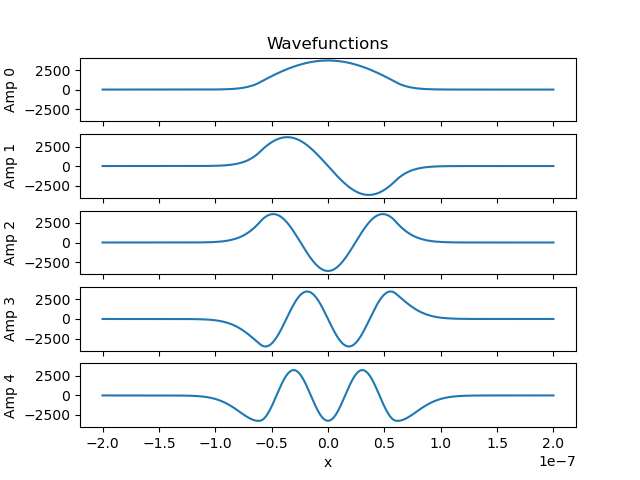

E_0 = 0.0000
E_1 = 0.0001
E_2 = 0.0002
E_3 = 0.0003
E_4 = 0.0004


Text(0.5, 0, 'x')

In [17]:
fig, axes = plt.subplots(5, sharex=True, sharey=True)
plt.sca(axes[0])
plt.title('Wavefunctions')
for i, (ax, Amp, E) in enumerate(zip(axes, vecs, vals_eV)):
    plt.sca(ax)
    plt.ylabel('Amp {}'.format(i))
    plt.plot(X, Amp)
    #plt.fill_between(X, psi, alpha=0.3)
    print('E_{} = {:.4f}'.format(i, E))
plt.xlabel('x')

- Plot of the probability density functions of outcomes of position measurements for the lowest 5 energy levels

<IPython.core.display.Javascript object>


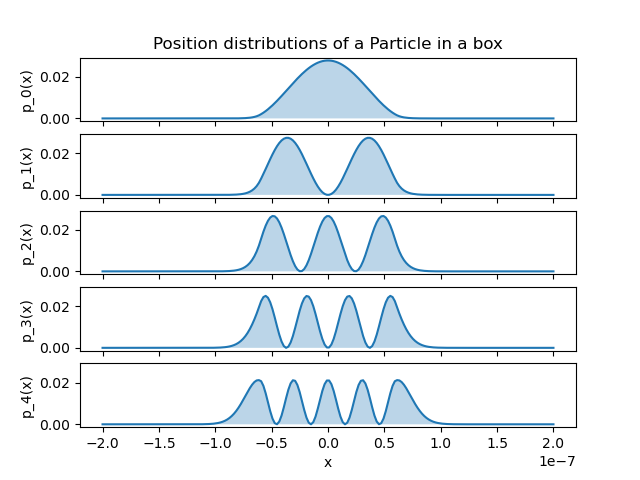

Text(0.5, 0, 'x')

In [18]:
fig, axes = plt.subplots(5, sharex=True, sharey=True)
plt.sca(axes[0])
plt.title('Position distributions of a Particle in a box')
for i, (ax, pd) in enumerate(zip(axes, probs)):
    plt.sca(ax)
    plt.ylabel('p_{}(x)'.format(i))
    plt.plot(X, pd)
    plt.fill_between(X, pd, alpha=0.3)
plt.xlabel('x')

### Problem 3: Harmonic Oscillator Frequencies

Once you have the energies of the wavefunctions for the quantum harmonic oscillator, let's make sure they look right.
We know the energy levels of the quantum harmonic oscillator states takes the form (see lecture notes for details):

$$ E_n = \eta \omega (n + \frac{1}{2}) $$

where $n$ is the energy level, $\eta$ is our natural constant ($\eta = \hbar$ in reality), and $\omega$ is the frequency of our oscillator.

You will note the ground state ($n=0$) still has some energy ($E_0=\frac{\eta \omega}{2}$), this is called the zero point energy, and it carries some deep significance in physics. (Among other things, the zero point energy is related to virtual photons predicted by Quantum Field Theory, and possibly even the dark energy in the universe...)

Anyway, use the computed energy values for the lowest 5 energy levels to estimate the frequency of our harmonic oscillator. Then use a smaller grid spacing (increase $N$) to make sure your estimate of the frequency has converged.

#### Answers:
The frequency of the harmonic oscillator in rad.s$^{-1}$ $\omega$ is calculated by the average value of $\frac{E_1-E_0}{\hbar}$, $\frac{E_2-E_1}{\hbar}$, and $\frac{E_3-E_2}{\hbar}$.

In [19]:
omega=((vals[1]-vals[0])/eta + (vals[2]-vals[1])/eta + (vals[3]-vals[2])/eta)/3
print ("The frequency of the harmonic oscillator are {:2f}rad/s for N={}".format(omega,N))
#print(np.sqrt(k/m))


The frequency of the harmonic oscillator are 129166477094.638046rad/s for N=200


In [20]:
N1 = 400  # Grid size is 400
X1 = np.linspace(-L,L,num=N1)
a1 = X1[1] - X1[0] # grid spacing
U1=[]
U1=np.array(U1, dtype=float)

for x in X1:
    U1=np.append(U1,V(x))
    
t1 = -eta**2 / (2 * m * a1**2)
eps1 = -2*t1 + U1

H1 = t1*np.eye(N1, k=-1) + eps1*np.eye(N1) + t1*np.eye(N1, k=1) # discretized hamiltonian
vals1, vecs1 = np.linalg.eig(H1) # Solve for Eigen function and eigen values
order1 = np.argsort(vals1) 
vals1, vecs1 = vals1[order1], vecs1[:, order1] # sort the eigen value and eigen functions
vecs1 = vecs1.T # Transpose
vecs1 /= np.sqrt(a1) #Normalize
vals_eV1=vals1/1.6e-19
omega1=((vals1[1]-vals1[0])/eta + (vals1[2]-vals1[1])/eta + (vals1[3]-vals1[2])/eta)/3
print ("The frequency of the harmonic oscillator are {:2f}rad/s for N={}".format(omega1,N1))

The frequency of the harmonic oscillator are 129729595442.012711rad/s for N=400


In [21]:
N2 = 1000  # Grid size is 200
X2 = np.linspace(-L,L,num=N2)
a2 = X2[1] - X2[0] # grid spacing

U2=[]
U2=np.array(U2, dtype=float)

for x in X2:
    U2=np.append(U2,V(x))

t2 = -eta**2 / (2 * m * a2**2)
eps2 = -2*t2 + U2

H2 = t2*np.eye(N2, k=-1) + eps2*np.eye(N2) + t2*np.eye(N2, k=1) # discretized hamiltonian
vals2, vecs2 = np.linalg.eig(H2) # Solve for Eigen function and eigen values
order2 = np.argsort(vals2) 
vals2, vecs2 = vals2[order2], vecs2[:, order2] # sort the eigen value and eigen functions
vecs2 = vecs2.T # Transpose
vecs2 /= np.sqrt(a2) #Normalize
vals_eV2=vals2/1.6e-19
omega2=((vals2[1]-vals2[0])/eta + (vals2[2]-vals2[1])/eta + (vals2[3]-vals2[2])/eta)/3
print ("The frequency of the harmonic oscillator are {:2f}rad/s for N={}".format(omega2,N2))

The frequency of the harmonic oscillator are 129998284293.136887rad/s for N=1000


As we can tell from the calculated the frequency when increasing the N in the calculation above, the frequency converges to $1.3*10^{11}rad.s^{-1}$.

## Phase Shifts

It may seem strange for our wavefunction to be complex valued. The fact of the matter is we trust Schrödinger's equation more than we trust our interpretation of the wavefunction. Mathematically, complex eigenfunctions of the hamiltonian exist, so our interpretation better have an explanation to make sense of this mathematical quirk.

The, rather elegant, solution is to recognize that eventhough the wavefunction may be complex, the outcomes of measurements are actually the corresponding eigenvalues, so as long as the eigenvalues are always real, it doesn't matter if eigenfunctions have an imaginary component.

Another quirk of the Schrödinger equation is that given any solution $\Psi(x,t)$, any arbitrary phase shift of $\Psi(x,t)$ will still be a solution.

### Problem 4: Phase of the Wavefunction

Show that if $\Psi(x,t)$ is a solution to the TDSE, then $e^{i\alpha} \Psi(x,t)$ (for some fixed $\alpha$) is also a solution. (Hint: this is a one liner)

#### Answer:
Considering the TDSE $ i \hbar \frac{\partial}{\partial t} \Psi (x, t) = \hat{\mathbf{H}} \Psi (x,t) $, if we time $e^{i\alpha}$ which is a fixed constant to the both side of the TDSE, we can find $e^{i\alpha} \Psi(x,t)$ is also a solution to the TDSE:
$$ i \hbar \frac{\partial}{\partial t} e^{i\alpha} \Psi (x, t) = \hat{\mathbf{H}} e^{i\alpha} \Psi (x,t) $$

## Example 2: Time Evolution

After turning the TDSE into the TISE using separation of variables, we focused on finding solutions for the TISE, but now that we have solutions for the TISE, we can go back and look at how our system evolves over time.

Once we have found a solution $\psi(x)$ and the corresponding energy $E$ using the TISE, we can combine it with the time component $\phi(t)$

$$ \hat{\mathbf{H}} \psi(x) = E \psi(x) $$

$$ \phi(t) = e^{-i\frac{E}{\hbar}t} $$

Now the overall solution to the TDSE is $\Psi(x,t) = \psi(x) \phi(t)$.

Let's take a look at how solutions to the particle in the box evolve over time using matplotlib animations.

In [22]:
import matplotlib.animation as animation

First we solve the TISE for the particle in the box, once again, to get the energies and eigenstates.

In [23]:
N = 100
L = 100

def V(x): # Return the potential energy given the position of each grid element
    return 0 * x # In this case, we are setting the potential energy to zero.

eta = 1
m = 1
q = 1

X = np.linspace(0,L,num=N) - L/2
a = X[1] - X[0] # grid spacing

t = -eta**2 / (2 * m * a**2)
eps = -2*t + q * V(X)

# Define discretized hamiltonian
H = t*np.eye(N, k=-1) + eps*np.eye(N) + t*np.eye(N, k=1)

# Solve TISE to get wavefunctions and energies
vals, vecs = np.linalg.eig(H)
order = np.argsort(vals)
vals, vecs = vals[order], vecs[:, order]
vecs = vecs.T
# Normalize wavefunction
vecs /= np.sqrt(a)

Now we define a function for matplotlib to call during the animation to get the state (wavefunction) at particular time intervals.

In [24]:
def evolve(psi, E, timestep=5, num_step=200):
    ts = np.arange(num_step)*timestep
    t = 0
    cnt = 0
    while num_step is None or cnt < num_step:
        phase = np.exp(- 1j * E / eta * t)
        cnt += 1
        t += timestep
        yield t, phase * psi

Here you can choose what the state of the particle should be, where `level = 0` corresponds to the ground state, `level = 1` to the first excited state etc.

In [25]:
level = 3
psi = vecs[level].astype(np.complex64)
E = vals[level]

Real component in red, imaginary in blue


<IPython.core.display.Javascript object>


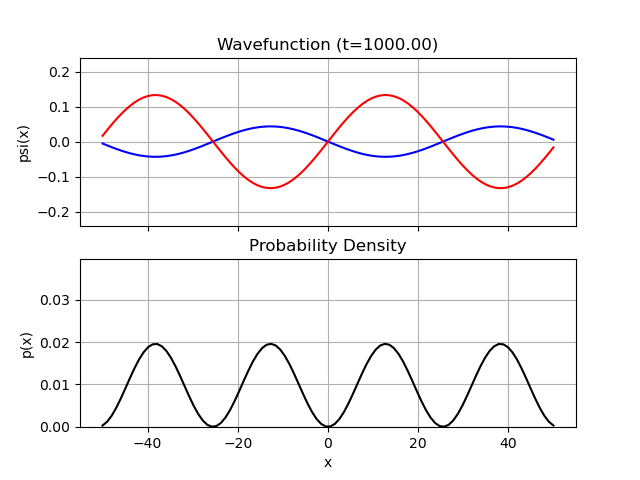

In [26]:
evolution = evolve(psi, E)

print('Real component in red, imaginary in blue')

fig, (ax1, ax2) = plt.subplots(2, sharex=True)
ax1.set_title('Wavefunction')
ax1.set_ylabel('psi(x)')
ax2.set_title('Probability Density')
ax2.set_ylabel('p(x)')
ax2.set_xlabel('x')
wave = psi
wave_real, = ax1.plot(X, wave.real, c='b')
wave_imag, = ax1.plot(X, wave.imag, c='r')
p = np.abs(wave)**2
dens, = ax2.plot(X, p, color='k')
ax1.grid()
ax2.grid()
lim = np.sqrt(p).max()+0.1
ax1.set_ylim(-lim, lim)
ax2.set_ylim(-1e-4, max(p)+0.02)

def run(data): # this updates the plot at every timestep given the wavefunction at the new time
    t, wave = data
    
    ax1.set_title('Wavefunction (t={:.2f})'.format(t))
    wave_real.set_data(X, wave.real)
    wave_imag.set_data(X, wave.imag)

    p = np.abs(wave)**2
    dens.set_data(X, p)
    
    return wave_real, wave_imag, dens

ani = animation.FuncAnimation(fig, run, evolution, blit=False, interval=10, repeat=False)

plt.show()

Note how eventhough the wavefunction is changing over time, the resulting probability density over positions doesn't change. We call the eigenstates of the hamiltonian stationary because the time dependence only changes the overall phase of the state, which does not affect any observable property of our particle.

### Problem 5: Wavefunctions Oscillate

As the time evolution of our stationary states is given by $ e^{-i\frac{E}{\hbar}t} $, we know our wavefunction oscillates with time.

Given a particle in the box in the second excited state $\psi_2$ with $\eta = 1$, $m = 1$, $L = 100$, and $N = 100$ (using the notation in the code, $a \approx 1$). If the wavefunction of our particle is entirely real at $t = 0$, what is the smallest amount of time we have to wait before the wavefunction is once again entirely real?

Compare the result you get empirically (using the numerical approach in Example 2) to what you would expect in theory.

#### Answer
Theoretical analysis:
When $t=0$, $e^{-i\frac{E_2}{\hbar}t}$ is equal to 1, then the wavefunction of the particle is entirely real. The next entirely real wavefunction happens when $\frac{E_2}{\hbar}t=\pi$ which will bring $e^{-i\frac{E_2}{\hbar}t}$ equal to $-1$. Then the amount of time is equal to:
$$t=\pi\frac{\hbar}{E_2}$$
The expression of $E_2$ is:
$$E_2=\frac{\hbar^2}{2m} (\frac{2\pi}{L})^2$$
Then the therotical time can be calculated as:

In [27]:
E2_theo=eta**2/(2*m)*((2*np.pi/(L))**2)
t_theo=np.pi*eta/E2_theo

In [28]:
print ("The theoretical calculated time is {:2f}".format(t_theo))

The theoretical calculated time is 1591.549431


In [29]:
t_num=np.pi*eta/vals[2]
print ("The numeraial calculated time is {:2f}".format(t_num))

The numeraial calculated time is 736.758464


### Ch2 Problem 5: 
Consider a free particle in one-dimension with the Hamiltonian $\hat{\mathbf{H}} = - \frac{\hbar^2}{2m} \frac{\partial^2}{\partial x^2}$. The eigenfunction of the Hamiltonian are $\phi_𝑘 = \frac{1}{\sqrt L}e^{ikx}$. The wave function of this system when the particle is localized at the origin $x=0$ is $\delta(x-0)$. This wave function can be expanded in terms of the eigenfunction of the free particle. Determine the coefficients in the expansion.

#### Answer:
The coefficients of the expansion can be calculated by using the euqation:
$$a_n=\int \phi_{n}^{*}(x)\phi(x)\,dx$$
where $\phi_n=\frac{1}{\sqrt L}e^{inx}$ and $\phi(x)=\delta(x-0)$. Then the coefficients of $a_n$ can be calculated:
$$a_n=\int \frac{1}{\sqrt L}e^{-inx}\delta(x)\,dx$$
$$a_n=\int \frac{1}{\sqrt L}\delta(x)\,dx$$
$$a_n=\frac{1}{\sqrt L}$$

### Ch3 Problem 9: 
Consider a 1-D problem with potential energy: 
$$ U(x)=   \left\{
\begin{array}{ll}
      \infty & for & x<0 \\
      \infty & for & x>L \\
      0 & for & 0<x<L \\
\end{array} 
\right.  $$
The eigenfunction corresponding to quantum number n is, $\psi_n=A_nsin(\frac{n\pi}{L}x)$, where $A_n$ is the normalization constant. Find the expectation value of the position operator for an electron in the state:
- (i) $\psi_2$ 
- (ii) $(\sqrt {3}\psi_1 -\sqrt {3}\psi_2 + 4\psi_3)/5$ at $t=0$
- (iii) Recalculate (ii) by including the time dependent part of the wave function. Derive an expression. 


#### Answer
- **(i)** At t=0, the expectation of the position is:
$$<x>=\int_{0}^{L} A_2sin(\frac{2\pi}{L}x)x A_2sin(\frac{2\pi}{L}x)\, dx $$
Where $A_n=\sqrt{\frac{2}{L}}$. And this integraal can be calculated using trigonometruc identity:
$$<x>=\frac{2}{L}\int_{0}^{L}\frac{x}{2}\,dx + \frac{2}{L}\int_{0}^{L}\frac{-x}{2}cos(\frac{4\pi x}{L})\,dx$$
The second term is equal to zero and $<x>=\frac{L}{2}$

- **(ii)** **Question to this part: seems this superposition wave function is not valid, becasue it is not normalized ($a_1^2+a_2^2+a_3^2=22/25\neq 1$).**
<br>
At t=0, the expectation of the position is:
$$<x>=\int_{0}^{L} A_n(\frac{\sqrt{3}}{5}sin(\frac{\pi}{L}x)-\frac{\sqrt{3}}{5}sin(\frac{2\pi}{L}x)+\frac{4}{5}sin(\frac{3\pi}{L}x))x A_n(\frac{\sqrt{3}}{5}sin(\frac{\pi}{L}x)-\frac{\sqrt{3}}{5}sin(\frac{2\pi}{L}x)+\frac{4}{5}sin(\frac{3\pi}{L}x)) \, dx $$
$$<x>=\frac{2}{L}\int_{0}^{L}x[\frac{3}{25}sin^{2}(\frac{\pi}{L}x)+\frac{3}{25}sin^{2}(\frac{2\pi}{L}x)+\frac{16}{25}sin^{2}(\frac{3\pi}{L}x)-\frac{6}{25}sin(\frac{\pi}{L}x)sin(\frac{2\pi}{L}x)+\frac{8\sqrt{3}}{25}sin(\frac{\pi}{L}x)sin(\frac{3\pi}{L}x)-\frac{8\sqrt{3}}{25}sin(\frac{2\pi}{L}x)sin(\frac{3\pi}{L}x)]\,dx$$
$$<x>=\frac{L}{2}\frac{3}{25}+\frac{L}{2}\frac{3}{25}+\frac{L}{2}\frac{16}{25}+0+0+0=\frac{11L}{25}$$
Since this superposition wave function is not valid (not normalized), the expectation of the position is not at $\frac{L}{2}$. If this is normalized, the expectation of the position should be at $\frac{L}{2}$.

- **(iii)** Include the time dependent part, the expression becomes:
$$<x>=\int_{0}^{L} A_n(e^{\frac{iE_1t}{\hbar}}\frac{\sqrt{3}}{5}sin(\frac{\pi}{L}x)-e^{\frac{iE_2t}{\hbar}}\frac{\sqrt{3}}{5}sin(\frac{2\pi}{L}x)+e^{\frac{iE_3t}{\hbar}}\frac{4}{5}sin(\frac{3\pi}{L}x))x A_n(e^{\frac{-iE_1t}{\hbar}}\frac{\sqrt{3}}{5}sin(\frac{\pi}{L}x)-e^{\frac{-iE_2t}{\hbar}}\frac{\sqrt{3}}{5}sin(\frac{2\pi}{L}x)+e^{\frac{-iE_3t}{\hbar}}\frac{4}{5}sin(\frac{3\pi}{L}x)) \, dx $$  
Where $E_n=\frac{\hbar^2}{2m} (\frac{n\pi}{L})^2$As we can see from the expression which include some additional cosine term for each interference between the three eigenfunctions. 

### Ch4 Problem 7: 
You are given a Hamiltonian, $H = \begin{pmatrix}
0 & 1 & 1\\
1 & 0 & 1\\
1 & 1 & 0
\end{pmatrix}$. Find the (a)Eigenvalues and (b)Eigenvectors and (c)show that the eigenvectors are both orthogonal and orthonormal. 

#### Answer:
This problem will be solved using Python Numpy.

In [30]:
H0=[[0,1,1],[1,0,1],[1,1,0]]
#print(H0)
vals, vecs = np.linalg.eig(H0)
order = np.argsort(vals)
vals, vecs = vals[order], vecs[:, order]
vecs = vecs.T

print ("The eigenvalues are {:2f}, {:2f}, {:2f}".format(vals[0],vals[1],vals[2]))
print ("The eigenvectors are ",format (vecs))

The eigenvalues are -1.000000, -1.000000, 2.000000
The eigenvectors are  [[-0.81649658  0.40824829  0.40824829]
 [-0.09265789 -0.65620994  0.74886783]
 [ 0.57735027  0.57735027  0.57735027]]


Check if the eigenvectors are orthnormal:

In [31]:
vecs_sq=vecs**2
#print(vecs_sq)
print (np.sum(vecs_sq,axis=1))

[1. 1. 1.]


Check if the eigenvectors are orthogonal:

In [32]:
print(vecs[0])
print(np.dot(vecs[0],vecs[1]))
print(np.dot(vecs[1],vecs[2]))
print(np.dot(vecs[0],vecs[2]))

[-0.81649658  0.40824829  0.40824829]
0.11348228018065126
1.6653345369377348e-16
-1.1102230246251565e-16
